In [26]:
%matplotlib inline

import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import grangercausalitytests
from scipy.stats import multivariate_normal
from mefn_util import check_convergence, pairwise_distances, load_constraint_info
from mefn_util import kernel_two_sample_test, simulate_VAR, compute_VAR_cov_np
import os
from dirichlet import simplex

os.chdir('/Users/sbittner/Documents/efn/');

constraint_id = 'normal_2VL';
nlayers = 4;
latent_gain = True;
random_seed = 0;
dynamics = False;



D, K_eta, params, constraint_type = load_constraint_info(constraint_id);
if (constraint_type == 'dirichlet'):
    alpha_targs = params['alpha_targs'];
    alpha_OL_targs = params['alpha_OL_targs'];
elif (constraint_type == 'normal'):
    Sigma_targs = params['Sigma_targs'];
    Sigma_OL_targs = params['Sigma_OL_targs'];
resdir = '2018-04-02_12';

basedir = '/Users/sbittner/Documents/dynamic_mefn/exp_fam/results/';

# make save directory string
gain_str = 'latent_gain' if latent_gain else 'output_gain';

savedir = basedir + resdir + '/tb/' + '%s_%s_%dlayers_K_eta=%d_seed=%d/' % (constraint_id, gain_str, nlayers, K_eta, random_seed);

fname = savedir + 'results.npz';
X = np.load(fname);
if (dynamics):
    As = X['As'];
    sigma_epsilons = X['sigma_epsilons'];
X_covs = X['X_covs'];
nits = X['it'];
x_OL = X['X_off_lattice'];
x = X['X'];

train_R2s = X['train_R2s'];
test_R2s = X['test_R2s'];
train_KLs = X['train_KLs'];
test_KLs = X['test_KLs'];
its = np.arange(nits);
fontsize = 20;


12


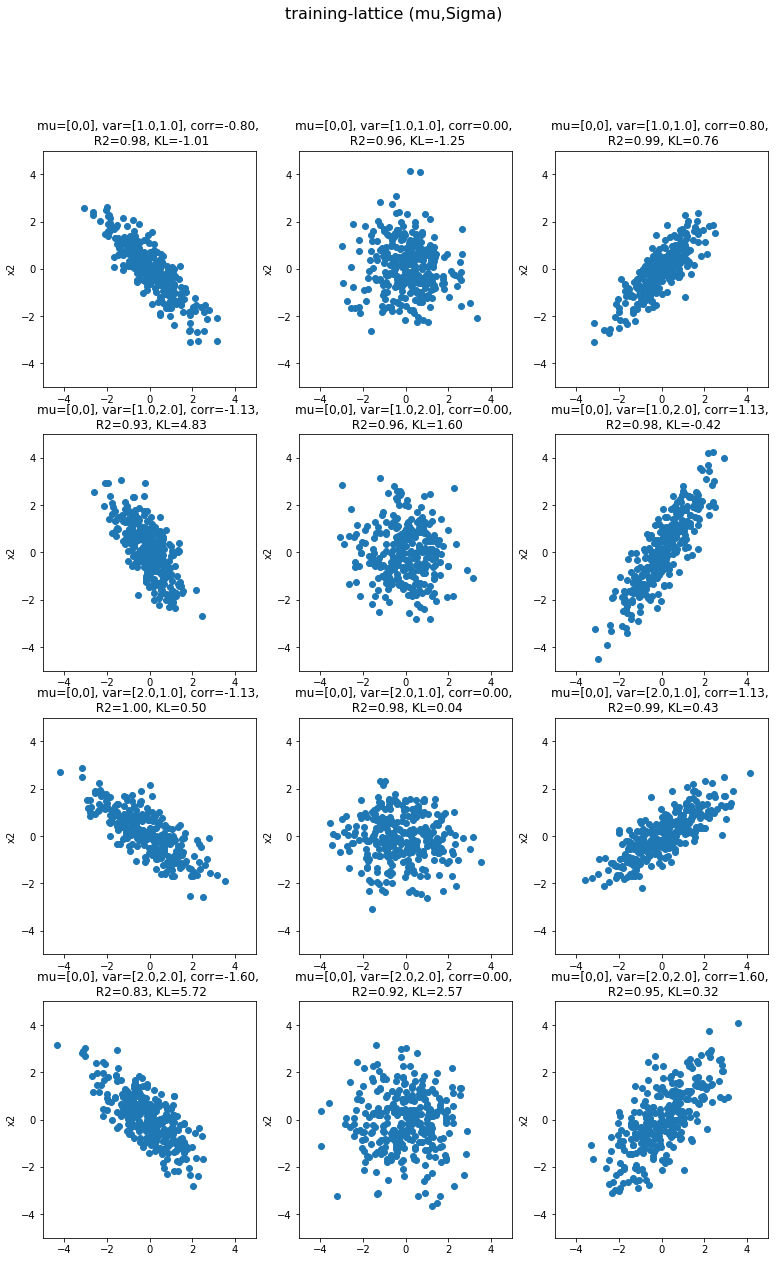

************************************************************************************


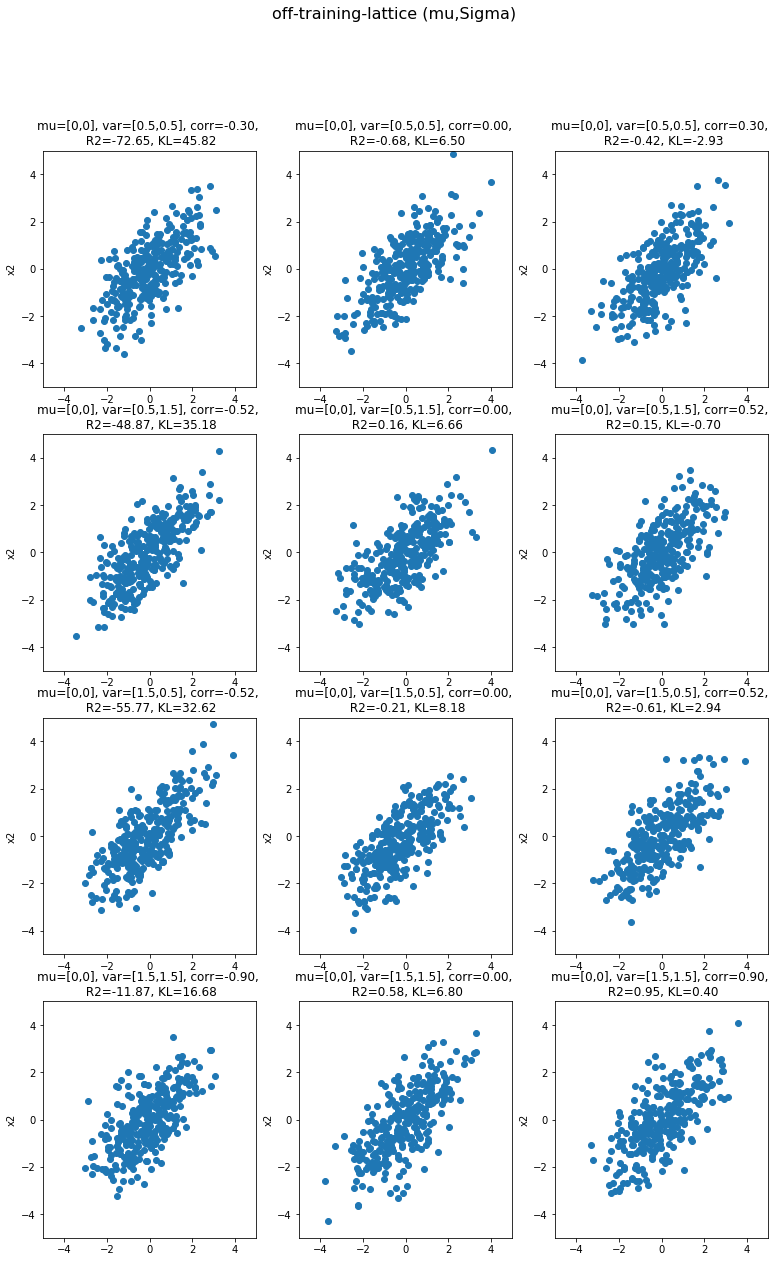

(3600, 2, 1)


In [34]:
n = x.shape[0];
print(K_eta);
n_k= n//K_eta;
corrs = [-.5, 0, .5];
axlim = 5;
if (constraint_type=='normal'):
    fig = plt.figure(figsize=(13,20));
    for i in range(K_eta):
        fig.add_subplot(4,3,i+1);
        k_start = i*n_k;
        k_end = (i+1)*n_k;
        plt.scatter(x[k_start:k_end,0,:], x[k_start:k_end,1,:]);
        if (i>11):
            plt.xlabel('x1');
        plt.ylabel('x2');
        plt.xlim([-axlim, axlim]);
        plt.ylim([-axlim, axlim]);
        plt.title('mu=[0,0], var=[%.1f,%.1f], corr=%.2f, \n R2=%.2f, KL=%.2f' % \
                  (Sigma_targs[i,0,0], Sigma_targs[i,1,1], Sigma_targs[i,0,1], train_R2s[-2,i], train_KLs[-2,i]));
    plt.suptitle('training-lattice (mu,Sigma)', fontsize=16);
    plt.show();
    print(84*'*');
    
    fig = plt.figure(figsize=(13,20));
    for i in range(K_eta):
        fig.add_subplot(4,3,i+1);
        k_start = i*n_k;
        k_end = (i+1)*n_k;
        plt.scatter(x_OL[k_start:k_end,0,:], x_OL[k_start:k_end,1,:]);
        if (i > 11):
            plt.xlabel('x1');
        plt.ylabel('x2');
        plt.xlim([-axlim, axlim]);
        plt.ylim([-axlim, axlim]);
        plt.title('mu=[0,0], var=[%.1f,%.1f], corr=%.2f, \n R2=%.2f, KL=%.2f' % \
                  (Sigma_OL_targs[i,0,0], Sigma_OL_targs[i,1,1], Sigma_OL_targs[i,0,1], test_R2s[-2,i], test_KLs[-2,i]));
    plt.suptitle('off-training-lattice (mu,Sigma)', fontsize=16);
    plt.show();

elif (constraint_id == 'dirichlet'):
    fig = plt.figure(figsize=(13,4));
    for i in range(K_eta):
        alpha_k = alpha_targs[i];
        fig.add_subplot(1,3,i+1);
        k_start = i*n_k;
        k_end = (i+1)*n_k;
        simplex.scatter(x[k_start:k_end,:,0], connect=False);
        plt.title('alpha = [%d, %d, %d]' % (alpha_k[0], alpha_k[1], alpha_k[2]));
    plt.suptitle('training-lattice alphas', fontsize=16);
    
    fig = plt.figure(figsize=(13,4));
    for i in range(K_eta):
        fig.add_subplot(1,3,i+1);
        alpha_OL_k = alpha_OL_targs[i];
        k_start = i*n_k;
        k_end = (i+1)*n_k;
        simplex.scatter(x_OL[k_start:k_end,:,0], connect=False);
        plt.title('alpha = [%.1f, %.1f, %.1f]' % (alpha_OL_k[0], alpha_OL_k[1], alpha_OL_k[2]));
    plt.suptitle('off-training-lattice alphas', fontsize=16);
plt.show();
print(x.shape);

(201, 3)


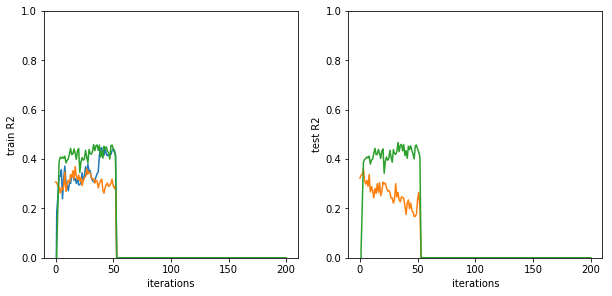

In [10]:
print(train_R2s.shape);

fig  = plt.figure(figsize=(10,10));
fig.add_subplot(2,2,1);
for k in range(K_eta):
    train_R2_k = train_R2s[:,k];
    plt.plot(train_R2_k);
plt.ylim([0, 1]);
plt.xlabel('iterations');
plt.ylabel('train R2');

fig.add_subplot(2,2,2);
for k in range(K_eta):
    test_R2_k = test_R2s[:,k];
    plt.plot(test_R2_k);
plt.ylim([0, 1]);
plt.xlabel('iterations');
plt.ylabel('test R2');
plt.show();

['g:0' 'PlanarFlow1/weights_u:0' 'PlanarFlow1/weights_w:0'
 'PlanarFlow1/weights_b:0' 'PlanarFlow2/weights_u:0'
 'PlanarFlow2/weights_w:0' 'PlanarFlow2/weights_b:0'
 'PlanarFlow3/weights_u:0' 'PlanarFlow3/weights_w:0'
 'PlanarFlow3/weights_b:0' 'PlanarFlow4/weights_u:0'
 'PlanarFlow4/weights_w:0' 'PlanarFlow4/weights_b:0']


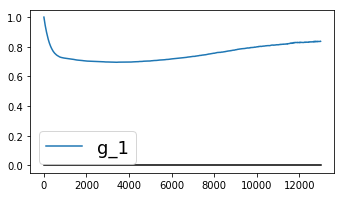

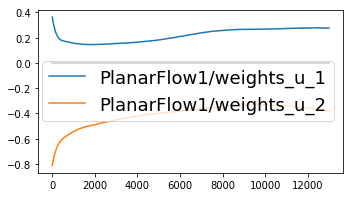

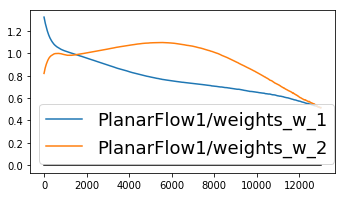

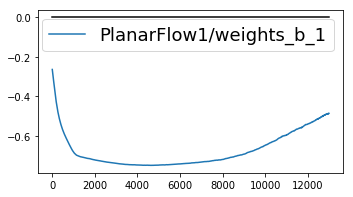

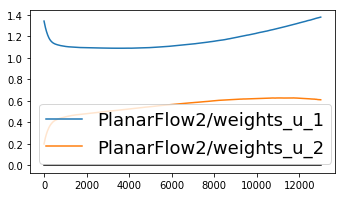

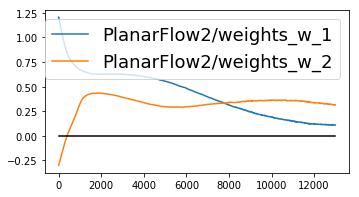

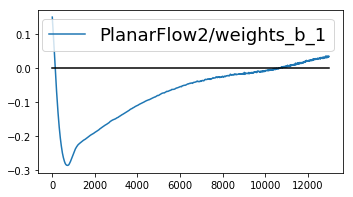

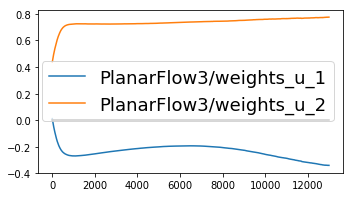

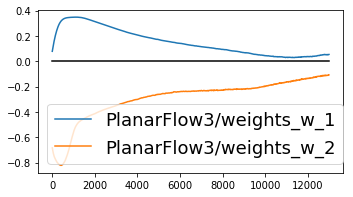

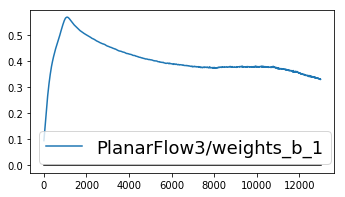

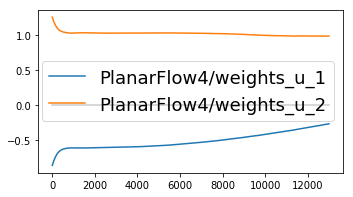

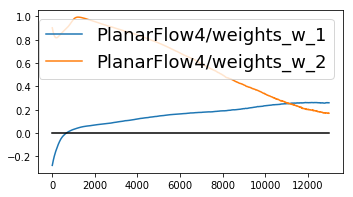

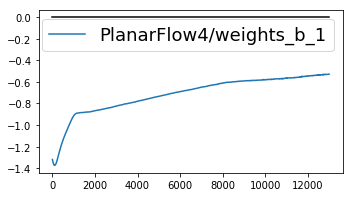

In [5]:
if ('flow_param_vals' in X):
    flow_param_vals = X['flow_param_vals'];
    cost_grad_vals = X['cost_grad_vals'];
    flow_param_names = X['flow_param_names'];
    flow_param_nvars = X['flow_param_nvars'];
    print(flow_param_names);
    if (dynamics):
        num_dyn_param_vals = K*D*D + D;
    nparams = len(flow_param_names);
    ind = 0;
    for i in range(nparams):
        param_name = flow_param_names[i];
        nvars = flow_param_nvars[i];
        fig = plt.figure(figsize=(12, 3));
        legendstrs = [];
        fig.add_subplot(1,2,1);
        for j in range(nvars):
            plt.plot(its, flow_param_vals[:nits, ind]);
            legendstrs.append('%s_%d' % (param_name[:-2], (j+1)));
            ind += 1;
        plt.legend(legendstrs, fontsize=(fontsize-2));
        plt.plot([0, nits], [0, 0], 'k-');
        #for i in range(num_epochs):
        #    plt.plot([training_epoch_its[i], training_epoch_its[i]], [np.min(flow_param_vals[:,(ind-int(nvars)):(ind)]), np.max(flow_param_vals[:,(ind-int(nvars)):(ind)])], 'k--');
        #plt.xlabel('iterations');
        #plt.title('variables', fontsize=fontsize);
        
        if (dynamics):
            ind = ind - int(nvars);
            fig.add_subplot(1,2,2);
            for j in range(nvars):
                plt.plot(its, cost_grad_vals[:nits, num_dyn_param_vals+ ind]);
                ind += 1;
            plt.legend(legendstrs, fontsize=(fontsize-2));
            for i in range(num_epochs):
                plt.plot([training_epoch_its[i], training_epoch_its[i]], [np.min(cost_grad_vals[:nits,num_dyn_param_vals:]), np.max(cost_grad_vals[:nits,num_dyn_param_vals:])], 'k--');
            plt.xlabel('iterations');
            plt.title('gradients', fontsize=fontsize);
    plt.show();

[[ 1.17710924  0.62709731]
 [ 0.62709731  1.09124553]]


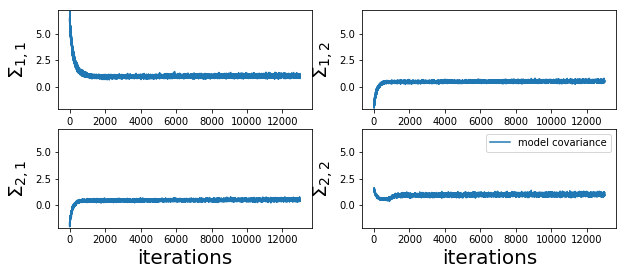

In [35]:
# plot mean spatial covariance across batch
cov_plot_buf = 0.1;
#ylim_min = min(np.min(X_covs), np.min(Sigma))-cov_plot_buf;
#ylim_max = max(np.max(X_covs), np.max(Sigma))+cov_plot_buf;
ylim_min = np.min(X_covs) - cov_plot_buf;
ylim_max = np.max(X_covs) + cov_plot_buf;
ylims = [ylim_min, ylim_max];
fig = plt.figure(figsize=(10,4));
print(X_covs[nits,:,:]);
for ii in range(D):
    for jj in range(D):
        fig.add_subplot(D, D, D*ii + jj + 1)
        plt.plot(its, X_covs[:nits, ii, jj]);
        #plt.plot([0, nits], [Sigma[ii,jj], Sigma[ii,jj]], 'k--');
        plt.ylabel(r'$\Sigma_{%d,%d}$' % (ii+1, jj+1), fontsize=fontsize);
        plt.ylim(ylims);
        if (ii==(D-1)):
            plt.xlabel('iterations', fontsize=fontsize);
            if (jj==(D-1)):
                plt.legend(['model covariance'], fontsize=fontsize-10);
plt.show();


(200, 6)
Visualize batch constraint violations
sample means
[-2.67305136 -1.67010772 -0.31575641  1.97745514  0.16189541  1.40812612
  1.40934122  0.56084692  0.66525787  0.55254465  1.41638637 -0.69189203
 -0.88202602 -0.08079191  1.44578195  1.10435474 -0.62326199 -0.17875074
  1.21012521 -1.27676272  0.42056498 -2.02531433  0.06359286 -1.65244365
 -0.11742914  1.65597618 -0.11871245  0.67500669 -0.33692518  0.46688789
  1.02521336  0.30994758  0.52308422 -0.78446078  0.02245758 -0.63107723
  0.07524818 -1.5818305  -0.6314491   0.71031475 -0.14603971 -0.18670651
  0.94606692 -1.05211735 -1.21259606  0.48785144 -0.80652219 -1.37419176
  1.69165957 -0.51439643  0.05268246 -0.20009817 -0.01472565 -0.3794342
  1.43434286  0.53485644 -0.94059122  2.14723158  1.37000287 -0.1473325
  0.52236503 -0.17446434  0.61502069 -0.10688622 -0.2121055  -0.356718
  0.82466406 -0.82782429  0.16517143 -0.32448214  0.14187269  0.38277972
 -1.16871047 -1.23261631 -1.55502915 -1.78125679 -0.55606902 -1.8758

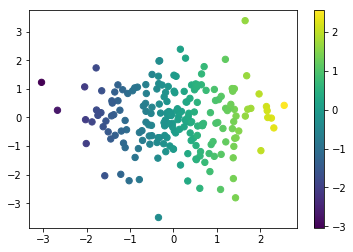

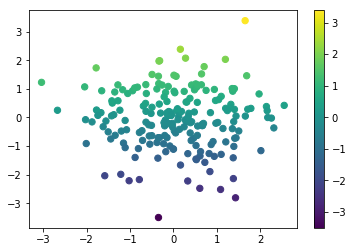

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


sample variances


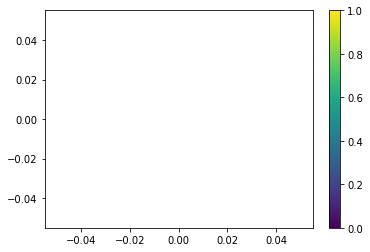

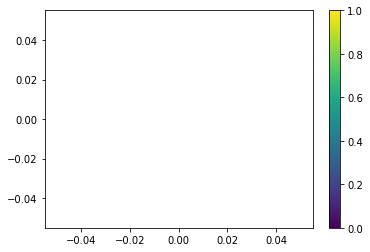

In [15]:
Tx = X['Tx'];
print(Tx.shape);
print('Visualize batch constraint violations');
print('sample means');
n = x.shape[0];
x_batch_means = np.mean(x, 2);
sizes = 40*np.ones(x_batch_means.shape[0]);
print(Tx[:,0])
print(Tx[:,1])
plt.figure();
plt.scatter(x_batch_means[:,0], x_batch_means[:,1], sizes, Tx[:,0]);
plt.colorbar();
plt.show();
plt.figure();
plt.scatter(x_batch_means[:,0], x_batch_means[:,1], sizes, Tx[:,1]);
plt.colorbar();
plt.show();

x_batch_mc = x - np.expand_dims(x_batch_means, 2);
x_batch_cov = np.zeros((n, D, D));
for i in range(n):
    x_batch_cov[i,:,:] = (1/T)*np.dot(x_batch_mc[i], x_batch_mc[i].T);

x_batch_cov_norm = np.mean(np.square(x_batch_cov - np.expand_dims(np.mean(x_batch_cov, 0), 0)), 0)
x_batch_cov_normed = np.divide(x_batch_cov, x_batch_cov_norm);
print('sample variances');
plt.figure();
plt.scatter(x_batch_cov_normed[:,0,0], x_batch_cov_normed[:,1,1], sizes, Tx[:,2]);
plt.colorbar();
plt.show();
plt.figure();
plt.scatter(x_batch_cov_normed[:,0,0], x_batch_cov_normed[:,1,1], sizes, Tx[:,4]);
plt.colorbar();
plt.show();

(50, 5)
Visualize batch constraint violations
sample means


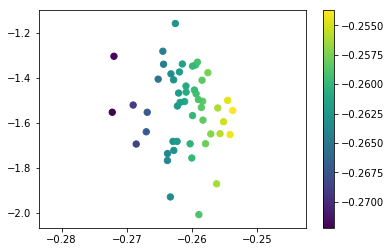

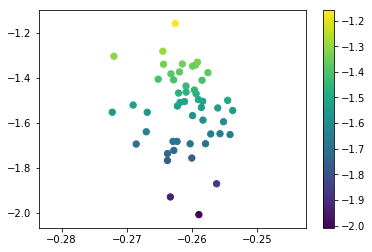

sample variances


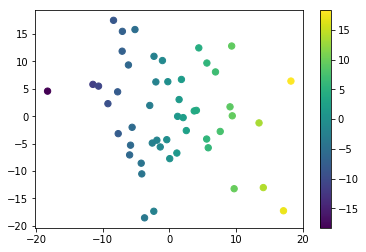

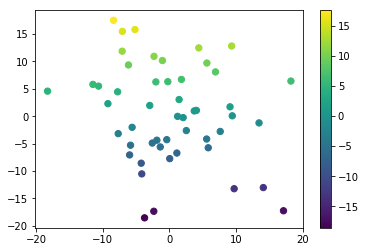

sample covariance violations


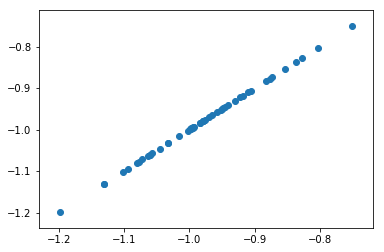

In [63]:
Tx = X['Tx'];
y = X['log_p_zs'];
y_mc = y - np.mean(y);
y_std = y / np.sum(np.square(y_mc));
print(Tx.shape);
print('Visualize batch constraint violations');
print('sample means');
n = x.shape[0];
Tx_mean = np.mean(x, 2); # [n x D];
Tx_mean_square = np.mean(np.square(Tx_mean), 0);
Tx_mean_normed = np.divide(Tx_mean, np.expand_dims(Tx_mean_square, 0));

sizes = 40*np.ones(Tx_mean.shape[0]);
plt.figure();
plt.scatter(Tx_mean_normed[:,0], Tx_mean_normed[:,1], sizes, Tx[:,0]);
plt.colorbar();
plt.show();
plt.figure();
plt.scatter(Tx_mean_normed[:,0], Tx_mean_normed[:,1], sizes, Tx[:,1]);
plt.colorbar();
plt.show();

print('sample variances');
n = x.shape[0];
X_mc = x - np.expand_dims(Tx_mean, 2);
Tx_cov = x_batch_cov  - np.expand_dims(Sigma, 0)# [n x D x D];
Tx_cov_square = np.mean(np.square(Tx_cov), 0);
Tx_cov_normed = np.divide(Tx_cov, np.expand_dims(Tx_cov_square, 0));

plt.figure();
plt.scatter(Tx_cov_normed[:,0,0], Tx_cov_normed[:,1,1], sizes, Tx[:,2]);
plt.colorbar();
plt.show();
plt.figure();
plt.scatter(Tx_cov_normed[:,0,0], Tx_cov_normed[:,1,1], sizes, Tx[:,4]);
plt.colorbar();
plt.show();

print('sample covariance violations');
plt.figure();
plt.scatter(Tx_cov_normed[:,0,1], Tx[:,3]);
plt.show();

In [22]:
alpha = 1000.0;
ncons = 2;
y_vec = np.expand_dims(y_mc, 1);
input_mat = Tx_mean_normed #- np.expand_dims(np.mean(Tx_mean_normed, 0), 0);
beta = np.dot(np.linalg.inv(np.dot(input_mat.T, input_mat) + alpha*np.eye(ncons)), np.dot(input_mat.T, y_vec));
print(beta);
Jerome L. Greene Science Center, 3227 Broadway, New York, NY 10027

[[ 0.00017754]
 [-0.00186526]]


In [16]:
if (has_temporal_con):
    # plot parameters throughout training
    fig = plt.figure(figsize=(18,4));
    for kk in range(K):
        fig.add_subplot(1,K+1,kk+1);
        legendstrs = [];
        for ii in range(D):
            for jj in range(D):
                plt.plot(its, As[:nits, kk, ii, jj]);
                legendstrs.append(r'$A%d_{%d,%d}$' % (kk+1, ii+1, jj+1));
        plt.legend(legendstrs, loc=3, fontsize=fontsize);
        plt.xlabel('iterations', fontsize=fontsize);
        if (kk==0):
            plt.title('dynamics coefficients', fontsize=fontsize)
            plt.ylabel('parameter value', fontsize=fontsize);
        plt.plot([0, nits], [0, 0], 'k-');
        for i in range(num_epochs):
            plt.plot([training_epoch_its[i], training_epoch_its[i]], [np.min(As[:,kk,:,:]), np.max(As[:,kk,:,:])], 'k--');
    fig.add_subplot(1,K+1,K+1);
    legendstrs = [];
    for ii in range(D):
        plt.plot(its, sigma_epsilons[:nits,ii]);
        legendstrs.append(r'$\sigma_{%d}$' % (ii+1));
    plt.title('dyanmics noise', fontsize=fontsize);
    plt.xlabel('iterations', fontsize=fontsize);
    plt.legend(legendstrs, fontsize=fontsize)
    plt.plot([0, nits], [0, 0], 'k-');
    for i in range(num_epochs):
        plt.plot([training_epoch_its[i], training_epoch_its[i]], [np.min(sigma_epsilons), np.max(sigma_epsilons)], 'k--');
    plt.show();


In [17]:
print(As[nits,:,:], sigma_epsilons[nits,:]);

NameError: name 'As' is not defined

IndexError: invalid index to scalar variable.

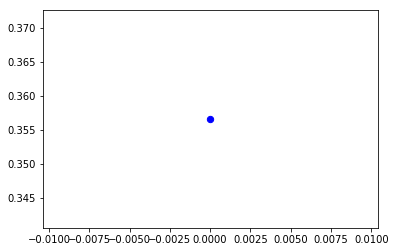

In [7]:
n = x.shape[0];
D = x.shape[1];
T = x.shape[2];

X_tau = np.zeros((D,tau_max+1));
X_toeps = [];
for i in range(D):
    X_toep = np.zeros((tau_max+1, (T-tau_max)*n));
    for j in range(n):
        for t in range(tau_max+1):
            X_toep[t,(j*(T-tau_max)):((j+1)*(T-tau_max))] = x[j,i,t:(t+(T-tau_max))];
    X_tau[i] = np.dot(np.expand_dims(X_toep[0,:],0), X_toep.T) / (n*(T-tau_max));
    X_toeps.append(X_toep);

for i in range(D):
    plt.figure();
    plt.scatter(np.arange(tau_max+1), X_tau[i,:], 40*np.ones((tau_max+1,)), 'b');
    plt.scatter(np.arange(tau_max+1), tau_targ[i, :(tau_max+1)], 40*np.ones((T,)), 'r');
    plt.show();
    
MSE = np.mean(np.square(np.mean(X_tau, 0) - tau_targ[:,:(tau_max+1)]));
print('MSE', MSE);

[0 2 4 6 8 1 3 5 7 9]
(10, 10)
simulated covariance


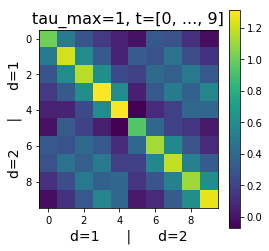

analytic covariance


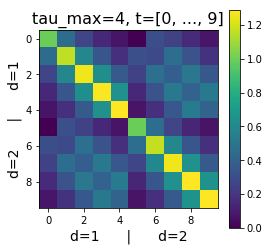

determinant 0.286995499153
diff 0.655880321697


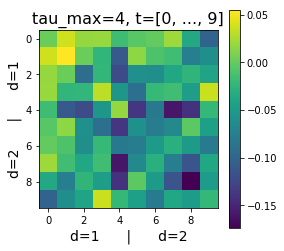

In [51]:
ind = nits-1000;
A = As[ind];
sigma_epsilon = sigma_epsilons[ind,:];
mu_eps = np.zeros((D,));
Sigma_eps = np.diag(sigma_epsilon);
nsamps = 5000;
T = 5;

# Compute the empricial covariance of a simulation
Zs = np.zeros((D*T, n));
np.random.seed(10);
for i in range(n):
    Zs[:,i] = np.reshape(simulate_VAR(A, Sigma_eps, T).T, (D*T,)).T;

Z_mc = Zs - np.expand_dims(np.mean(Zs, 1), 1);
Zcov = np.dot(Z_mc, Z_mc.T) / n;

inds = np.reshape(np.array([np.arange(0, 2*T, 2), np.arange(1, 2*T, 2)]), (D*T,));
print(inds);
Zcov_byD = Zcov[:,inds];
Zcov_byD = Zcov_byD[inds,:];
print(Zcov_byD.shape);

print('simulated covariance');
plt.figure(figsize=(4,4));
plt.imshow(Zcov_byD);
plt.title('tau_max=1, t=[0, ..., 9]', fontsize=16);
plt.xlabel('d=1      |      d=2', fontsize=14);
plt.ylabel('d=2      |      d=1', fontsize=14);
plt.colorbar();
plt.show();

print('analytic covariance');
Zcov_analytic = compute_VAR_cov_np(A, Sigma_eps, D, K, T);
Zcov_analytic_byD = Zcov_analytic[:,inds];
Zcov_analytic_byD = Zcov_analytic_byD[inds, :];
plt.figure(figsize=(4,4));
plt.imshow(Zcov_analytic_byD);
plt.title('tau_max=%d, t=[0, ..., 9]' % tau_max, fontsize=16);
plt.xlabel('d=1      |      d=2', fontsize=14);
plt.ylabel('d=2      |      d=1', fontsize=14);
plt.colorbar();
plt.show();
print('determinant', np.linalg.det(Zcov_analytic));

diff = Zcov_byD - Zcov_analytic_byD;
print('diff', np.linalg.norm(Zcov_byD - Zcov_analytic_byD));
plt.figure(figsize=(4,4));
plt.imshow(diff);
plt.title('tau_max=%d, t=[0, ..., 9]' % tau_max, fontsize=16);
plt.xlabel('d=1      |      d=2', fontsize=14);
plt.ylabel('d=2      |      d=1', fontsize=14);
plt.colorbar();
plt.show();

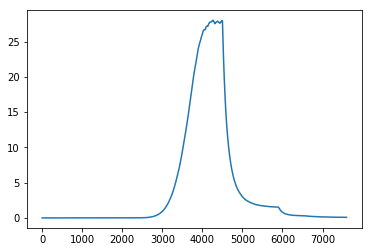

In [52]:
dets = np.zeros((nits,));
for i in range(nits):
    sigma_epsilon = sigma_epsilons[i,:];
    Sigma_eps = np.diag(sigma_epsilon);
    Zcov_analytic = compute_VAR_cov_np(As[i], Sigma_eps, D, K, T);
    dets[i] = np.linalg.det(Zcov_analytic);
    
plt.figure();
plt.plot(dets);
plt.show();

In [21]:
dist = multivariate_normal(np.zeros((D*T,)), Zcov_analytic);
print('true entropy', dist.entropy());

true entropy 15.8579609197
